In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("../docs/error_voltage_all.csv")
df

,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,2.0,12.000000,0.333333,0.444444,0.083333,0.266667,0.388889,0.571429,16.476190
1,8.0,0.666667,0.333333,0.666667,1.333333,0.266667,0.222222,0.571429,17.047619
2,2.0,3.333333,0.333333,0.222222,0.333333,0.066667,0.111111,0.428571,17.285714
3,8.0,1.666667,0.166667,0.888889,0.083333,0.066667,1.055556,1.047619,18.095238
4,12.0,1.666667,0.500000,1.444444,0.083333,1.066667,0.111111,0.809524,18.714286
...,...,...,...,...,...,...,...,...,...
995,12.0,2.666667,1.166667,0.444444,0.083333,0.066667,0.222222,0.571429,14.761905
996,32.0,2.333333,0.833333,0.444444,0.083333,0.066667,1.055556,0.428571,16.142857
997,8.0,1.666667,1.666667,0.444444,0.333333,0.066667,0.388889,0.190476,17.285714
998,26.0,0.000000,1.166667,0.444444,0.083333,0.066667,0.111111,0.428571,18.333333


In [3]:
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

list_voltage

['0.5v', '3v', '6v', '9v', '12v', '15v', '18v', '21v', '24.5v']

In [4]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']

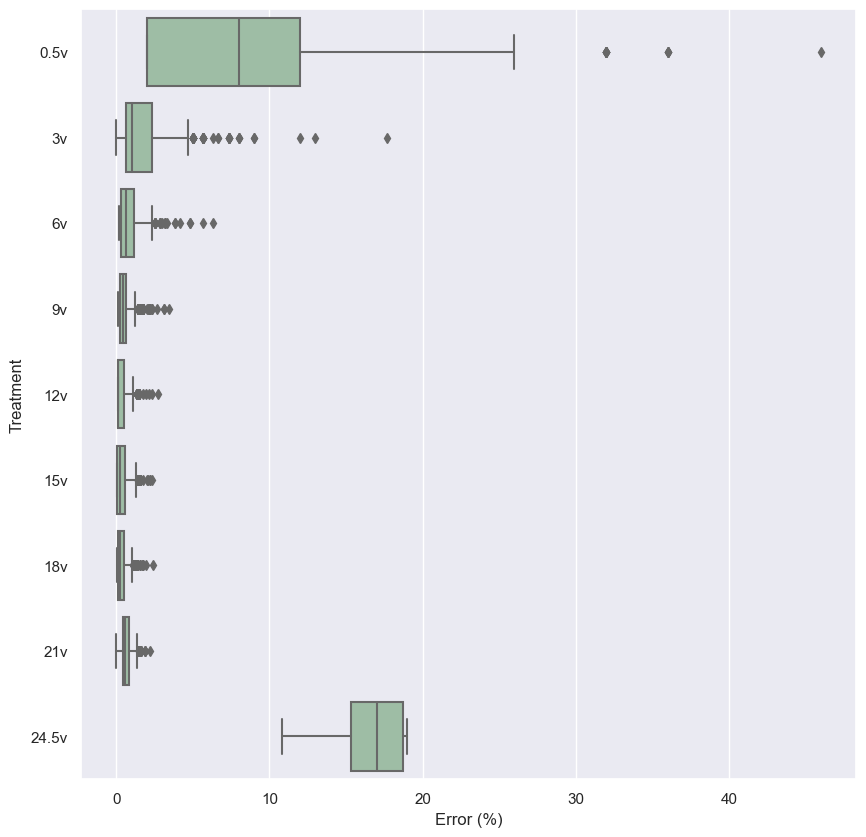

In [5]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_melt, color='#99c2a2')
ax.set(xlabel='Error (%)', ylabel='Treatment')
plt.show()

In [6]:

f_stat, p_value = scipy.stats.f_oneway(df["0.5v"], df["3v"], df["6v"], df["9v"], df["12v"], df["15v"], df["18v"], df["21v"])
print(f"{f_stat}, {p_value}")

1298.351419955744, 0.0


In [7]:
df.columns

Index(['0.5v', '3v', '6v', '9v', '12v', '15v', '18v', '21v', '24.5v'], dtype='object')

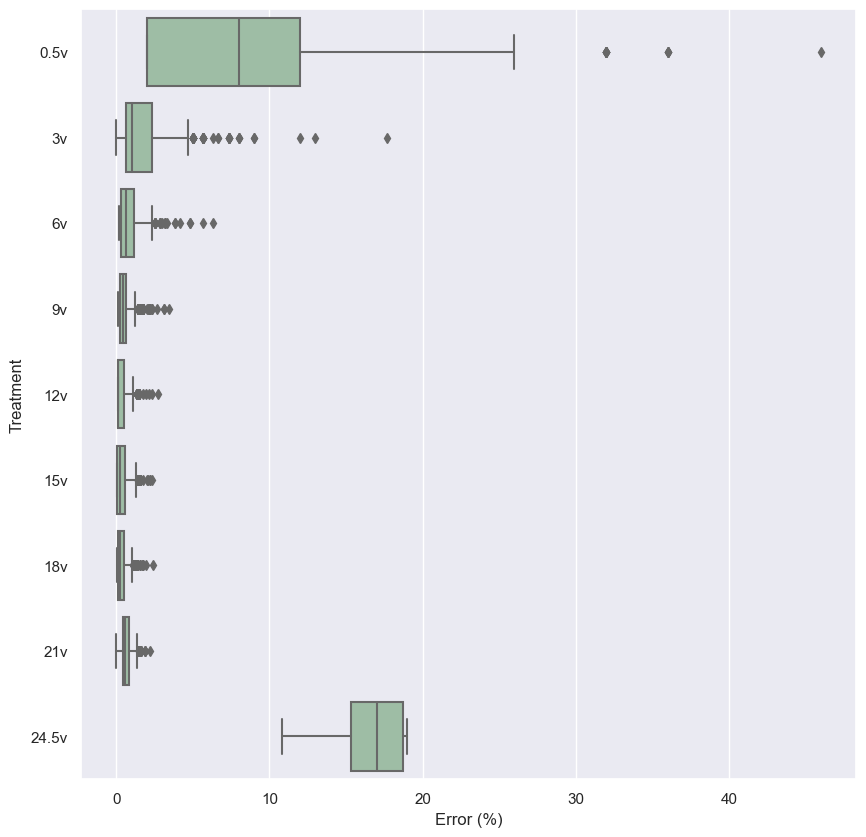

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxplot(x='value', y='voltage', data=df_melt, color='#99c2a2')
ax.set(xlabel='Error (%)', ylabel='Treatment')
plt.show()

<AxesSubplot:title={'center':'value'}, xlabel='voltage'>

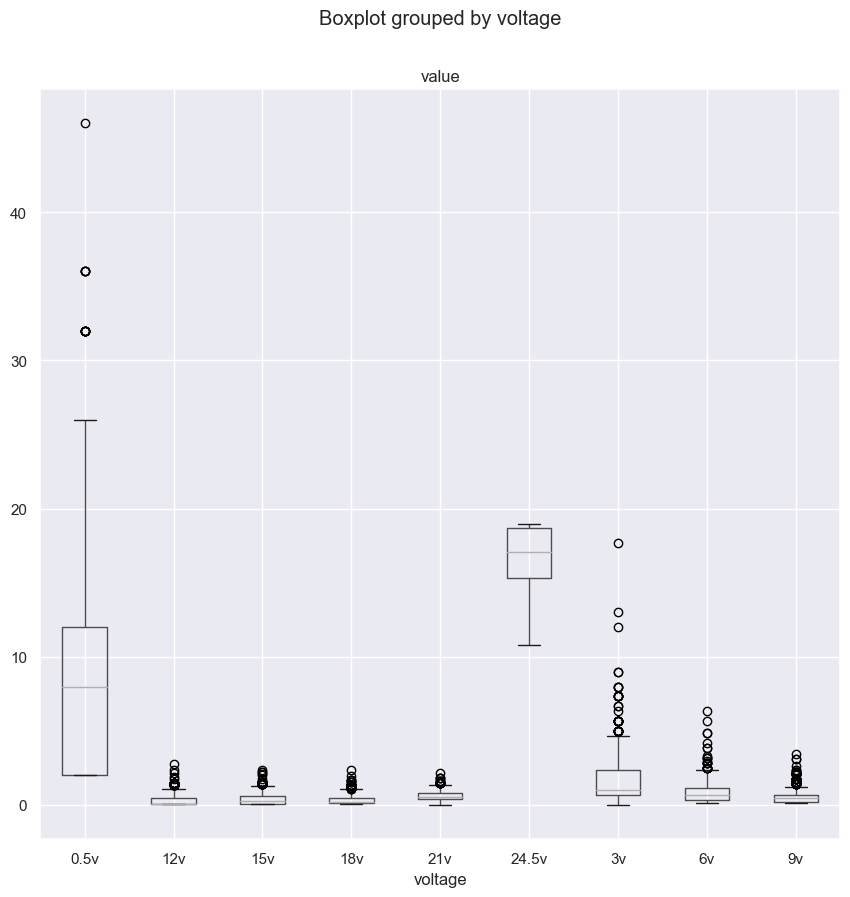

In [9]:
df_melt.boxplot('value', by='voltage')

In [10]:
new = ols('value ~ voltage', data = df_melt).fit()
an = sm.stats.anova_lm(new)
an

,df,sum_sq,mean_sq,F,PR(>F)
voltage,8.0,262179.422845,32772.427856,5686.649092,0.0
Residual,8991.0,51815.558530,5.763047,NaN,NaN


In [11]:
df

,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,2.0,12.000000,0.333333,0.444444,0.083333,0.266667,0.388889,0.571429,16.476190
1,8.0,0.666667,0.333333,0.666667,1.333333,0.266667,0.222222,0.571429,17.047619
2,2.0,3.333333,0.333333,0.222222,0.333333,0.066667,0.111111,0.428571,17.285714
3,8.0,1.666667,0.166667,0.888889,0.083333,0.066667,1.055556,1.047619,18.095238
4,12.0,1.666667,0.500000,1.444444,0.083333,1.066667,0.111111,0.809524,18.714286
...,...,...,...,...,...,...,...,...,...
995,12.0,2.666667,1.166667,0.444444,0.083333,0.066667,0.222222,0.571429,14.761905
996,32.0,2.333333,0.833333,0.444444,0.083333,0.066667,1.055556,0.428571,16.142857
997,8.0,1.666667,1.666667,0.444444,0.333333,0.066667,0.388889,0.190476,17.285714
998,26.0,0.000000,1.166667,0.444444,0.083333,0.066667,0.111111,0.428571,18.333333


In [12]:
df_melt

,index,voltage,value
0,0,0.5v,2.000000
1,1,0.5v,8.000000
2,2,0.5v,2.000000
3,3,0.5v,8.000000
4,4,0.5v,12.000000
...,...,...,...
8995,995,24.5v,14.761905
8996,996,24.5v,16.142857
8997,997,24.5v,17.285714
8998,998,24.5v,18.333333


Post Hoc Comparison, Tukey-kramer formula

In [13]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
df = res.tukey_summary

g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


In [ ]:
val = []
for i in df["p-value"]:
    if i > 0.05:
        val.append("False")
    else:
        val.append("True")
val = pd.DataFrame(val, columns=["reject"])
df = pd.concat([df, val], axis=1)
df.to_csv('../docs/Tukey-HSD-p-value.csv', index=False)
df.to_excel('../docs/Tukey-HSD-p-value.xlsx', index=False)
df

,group1,group2,Diff,Lower,Upper,q-value,p-value,reject
0,0.5v,3v,6.923667,6.588298,7.259035,88.513673,0.001000,True
1,0.5v,6v,7.725167,7.389798,8.060535,98.760225,0.001000,True
2,0.5v,9v,8.031778,7.696409,8.367146,102.680008,0.001000,True
3,0.5v,12v,8.201917,7.866548,8.537285,104.855101,0.001000,True
4,0.5v,15v,8.164467,7.829098,8.499835,104.376332,0.001000,True
5,0.5v,18v,8.189611,7.854243,8.524980,104.697784,0.001000,True
6,0.5v,21v,7.938905,7.603536,8.274273,101.492699,0.001000,True
7,3v,6v,0.801500,0.466131,1.136869,10.246552,0.001000,True
8,3v,9v,1.108111,0.772743,1.443480,14.166335,0.001000,True
9,3v,12v,1.278250,0.942881,1.613619,16.341428,0.001000,True


In [ ]:
only_p_value = df.drop(["Diff","Lower","Upper","q-value"], axis=1)
only_p_value.to_csv("../docs/tukey_only_p-value.csv", index=False)
only_p_value.to_excel("../docs/tukey_only_p-value.xlsx", index=False)